In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from random import randint
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
vols=pd.read_csv('flights2.csv', low_memory=False)

In [11]:
# Comparaison des retards au départ et à l'arrivée
vols.loc[:,["DEPARTURE_DELAY","ARRIVAL_DELAY"]].describe()

DEPARTURE_DELAY  ARRIVAL_DELAY
count     5.714008e+06   5.714008e+06
mean      9.294842e+00   4.407057e+00
std       3.688972e+01   3.927130e+01
min      -8.200000e+01  -8.700000e+01
25%      -5.000000e+00  -1.300000e+01
50%      -2.000000e+00  -5.000000e+00
75%       7.000000e+00   8.000000e+00
max       1.988000e+03   1.971000e+03

In [14]:
# Comparaison du nombre de retards au départ et à l'arrivée
print("Nombre de retards au départ : ", len(vols[vols["DEPARTURE_DELAY"]>0]),
      "vs nombre de retards à l'arrivée : ", len(vols[vols["ARRIVAL_DELAY"]>0]))

Nombre de retards au départ :  2115049 vs nombre de retards à l'arrivée :  2086896


In [3]:
# Nombre de retards et vols au départ par aéroports d'origine
Retards_vols_aeroports1 = vols[(vols["DEPARTURE_DELAY"] > 0)]["ORIGIN_AIRPORT"].value_counts()
Nombre_vols_aeroports1 = vols["ORIGIN_AIRPORT"].value_counts()
Retards_vols_aeroports1 = Retards_vols_aeroports1.reset_index().sort_values(by='index',ascending=True).set_index('index')
Nombre_vols_aeroports1 = Nombre_vols_aeroports1.reset_index().sort_values(by='index',ascending=True).set_index('index')

In [4]:
# Calculs des proportions de retards par aéroports
n = len(Retards_vols_aeroports1)
Proportions = np.zeros(n)
j = 0
for i in range(n):
    while (Retards_vols_aeroports1.index[i]!=Nombre_vols_aeroports1.index[j]):
        j+=1
    Proportions[i] = Retards_vols_aeroports1.iloc[i,0]/Nombre_vols_aeroports1.iloc[j,0]
    j+=1
Proportions_triees = pd.DataFrame(Proportions,Retards_vols_aeroports1.index).sort_values(by=0,ascending=True)

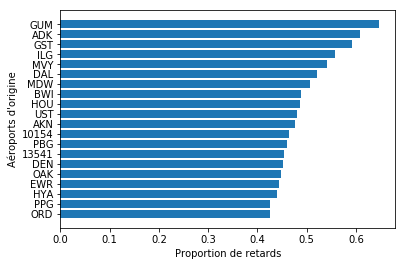

In [5]:
# Affichage des 20 aéroports où la proportion de retards est la plus élevée
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index[len(Proportions_triees)-20:], Proportions_triees.iloc[len(Proportions_triees)-20:,0])
plt.ylabel("Aéroports d'origine")
plt.xlabel("Proportion de retards")
plt.show()

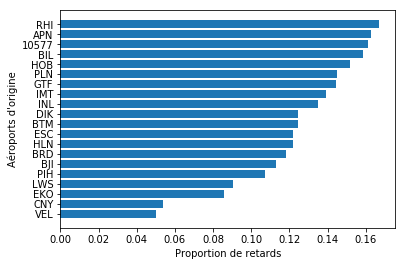

In [6]:
# Affichage des 20 aéroports où la proportion de retards est la plus faible
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index[:20], Proportions_triees.iloc[:20,0])
plt.ylabel("Aéroports d'origine")
plt.xlabel("Proportion de retards")
plt.show()

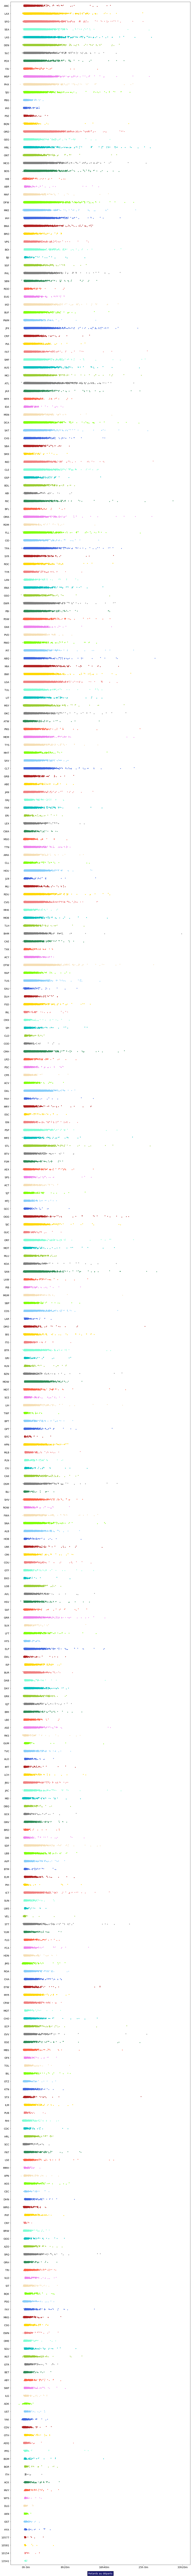

In [165]:
# Visualisation des temps de retards par aéroport de départ
fig = plt.figure(1, figsize=(15,200))
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

axe = sns.stripplot(y="ORIGIN_AIRPORT", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=vols.loc[:, ['ORIGIN_AIRPORT', 'DEPARTURE_DELAY']])
plt.setp(axe.get_xticklabels(), fontsize=14)
plt.setp(axe.get_yticklabels(), fontsize=14)
axe.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in axe.get_xticks()])
plt.xlabel('Retards au départ', fontsize=14, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
axe.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 
plt.show()

In [7]:
# Nombre de retards et vols au départ par compagnie aérienne
Retards_vols_compagnies1 = vols[(vols["DEPARTURE_DELAY"] > 0)]["AIRLINE"].value_counts()
Nombre_vols_compagnies1 = vols["AIRLINE"].value_counts()
Retards_vols_compagnies1 = Retards_vols_compagnies1.reset_index().sort_values(by='index',ascending=True).set_index('index')
Nombre_vols_compagnies1 = Nombre_vols_compagnies1.reset_index().sort_values(by='index',ascending=True).set_index('index')

In [8]:
# Calculs des proportions de retards par compagnie aérienne
n = len(Retards_vols_compagnies1)
Proportions = np.zeros(n)
j = 0
for i in range(n):
    while (Retards_vols_compagnies1.index[i]!=Nombre_vols_compagnies1.index[j]):
        j+=1
    Proportions[i] = Retards_vols_compagnies1.iloc[i,0]/Nombre_vols_compagnies1.iloc[j,0]
    j+=1
Proportions_triees = pd.DataFrame(Proportions,Retards_vols_compagnies1.index).sort_values(by=0,ascending=True)

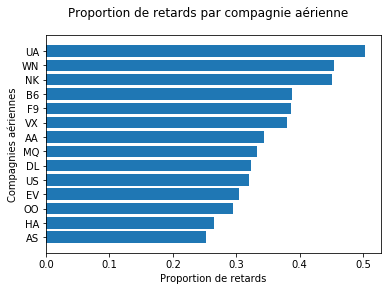

In [9]:
# Affichage des proportions de retards par compagnie
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index, Proportions_triees.iloc[:,0])
fig.suptitle("Proportion de retards par compagnie aérienne")
plt.ylabel("Compagnies aériennes")
plt.xlabel("Proportion de retards")
plt.show()

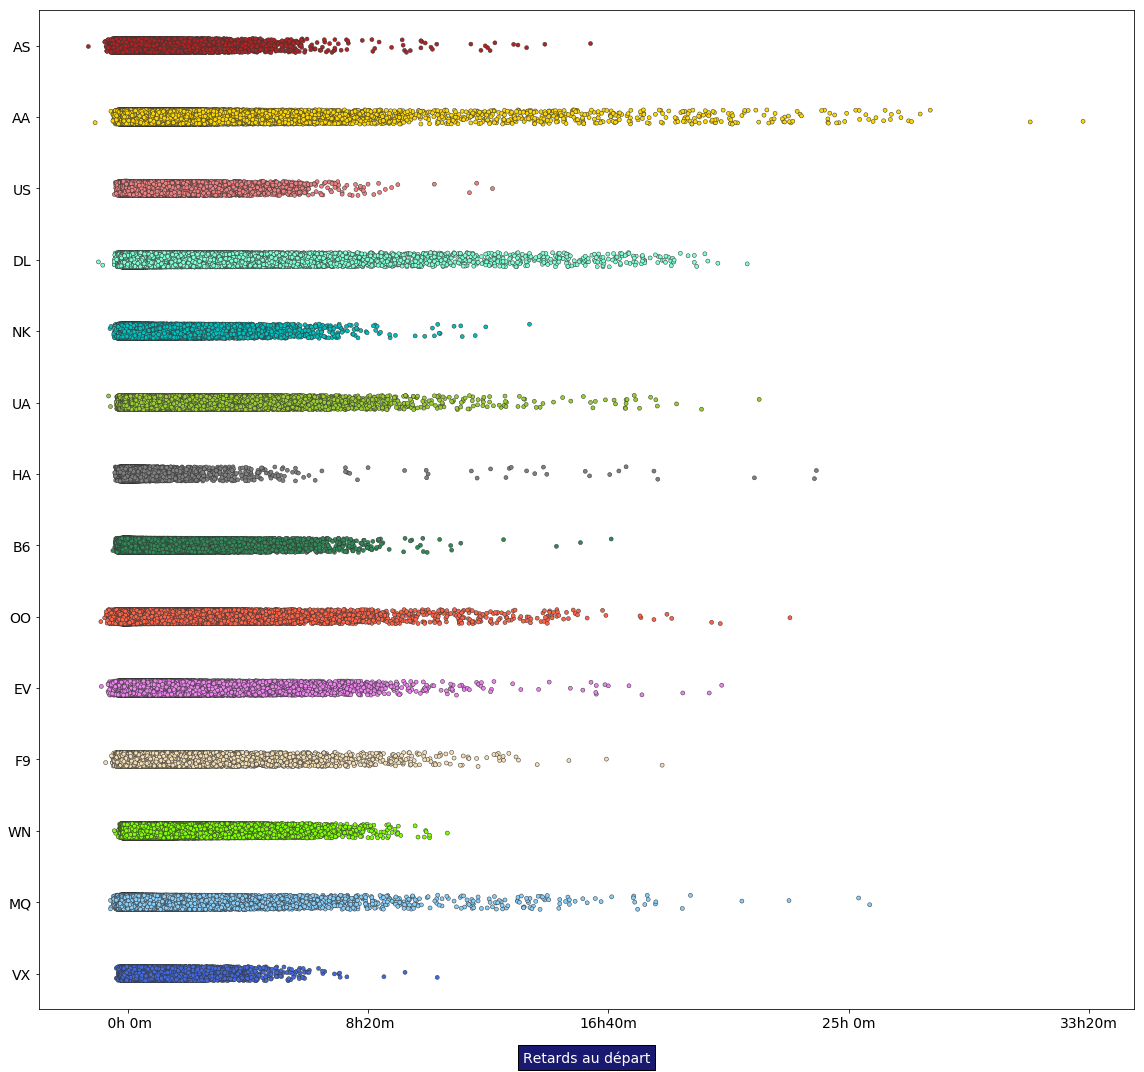

In [3]:
# Visualisation des temps de retards par compagnie aérienne
fig = plt.figure(1, figsize=(16,15))
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

axe = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=vols.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']], linewidth = 0.5,  jitter=True)
plt.setp(axe.get_xticklabels(), fontsize=14)
plt.setp(axe.get_yticklabels(), fontsize=14)
axe.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in axe.get_xticks()])
plt.xlabel('Retards au départ', fontsize=14, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
axe.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 
plt.show()

In [10]:
# Nombre de retards et vols au départ par mois
Retards_vols_mois = vols[(vols["DEPARTURE_DELAY"] > 0)]["MONTH"].value_counts()
Nombre_vols_mois = vols["MONTH"].value_counts()
Retards_vols_mois = Retards_vols_mois.reset_index().sort_values(by='index',ascending=True).set_index('index')
Nombre_vols_mois = Nombre_vols_mois.reset_index().sort_values(by='index',ascending=True).set_index('index')

In [11]:
# Calculs des proportions de retards par mois
n = len(Retards_vols_mois)
Proportions = np.zeros(n)
j = 0
for i in range(n):
    while (Retards_vols_mois.index[i]!=Nombre_vols_mois.index[j]):
        j+=1
    Proportions[i] = Retards_vols_mois.iloc[i,0]/Nombre_vols_mois.iloc[j,0]
    j+=1
Proportions_triees = pd.DataFrame(Proportions,Retards_vols_mois.index).sort_values(by=0,ascending=False)

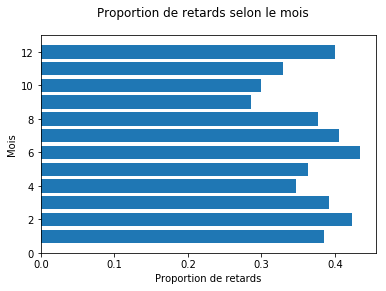

In [12]:
# Affichage des proportions de retards par mois
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index, Proportions_triees.iloc[:,0])
fig.suptitle("Proportion de retards selon le mois")
plt.ylabel("Mois")
plt.xlabel("Proportion de retards")
plt.show()

In [21]:
# Nombre de retards et vols au départ par jour de la semaine
Retards_vols_jour = vols[(vols["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"].value_counts()
Nombre_vols_jour = vols["DAY_OF_WEEK"].value_counts()
Retards_vols_jour = Retards_vols_jour.reset_index().sort_values(by='index',ascending=True).set_index('index')
Nombre_vols_jour = Nombre_vols_jour.reset_index().sort_values(by='index',ascending=True).set_index('index')

In [22]:
# Calculs des proportions de retards par jour de la semaine
n = len(Retards_vols_jour)
Proportions = np.zeros(n)
j = 0
for i in range(n):
    while (Retards_vols_jour.index[i]!=Nombre_vols_jour.index[j]):
        j+=1
    Proportions[i] = Retards_vols_jour.iloc[i,0]/Nombre_vols_jour.iloc[j,0]
    j+=1
Proportions_triees = pd.DataFrame(Proportions,Retards_vols_jour.index).sort_values(by=0,ascending=False)

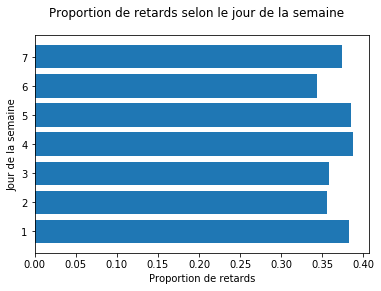

In [28]:
# Affichage des proportions de retards par jour de la semaine
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index, Proportions_triees.iloc[:,0])
fig.suptitle("Proportion de retards selon le jour de la semaine")
plt.ylabel("Jour de la semaine")
plt.xlabel("Proportion de retards")
plt.show()

In [36]:
# Nombre de retards et vols au départ par heure
Retards_vols_heure = vols[(vols["DEPARTURE_DELAY"] > 0)]["SCHEDULED_DEPARTURE"].value_counts()
Nombre_vols_heure = vols["SCHEDULED_DEPARTURE"].value_counts()
Retards_vols_heure = Retards_vols_heure.reset_index().sort_values(by='index',ascending=True).set_index('index')
Nombre_vols_heure = Nombre_vols_heure.reset_index().sort_values(by='index',ascending=True).set_index('index')

In [37]:
# Calculs des proportions de retards par heure
n = len(Retards_vols_heure)
Proportions = np.zeros(n)
j = 0
for i in range(n):
    
    while (Retards_vols_heure.index[i]!=Nombre_vols_heure.index[j]):
        j+=1
    Proportions[i] = Retards_vols_heure.iloc[i,0]/Nombre_vols_heure.iloc[j,0]
    j+=1
Proportions_triees = pd.DataFrame(Proportions,Retards_vols_heure.index).sort_values(by=0,ascending=True)

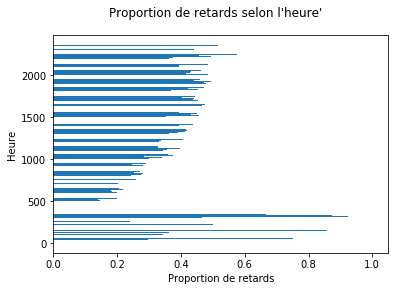

In [38]:
# Affichage des proportions de retards par heure
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index, Proportions_triees.iloc[:,0])
fig.suptitle("Proportion de retards selon l'heure'")
plt.ylabel("Heure")
plt.xlabel("Proportion de retards")
plt.show()

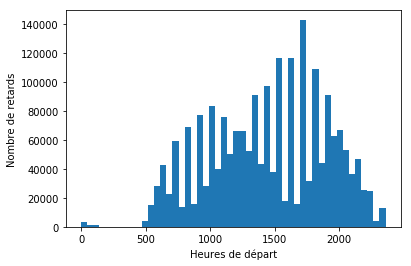

In [27]:
# Nombre de retards en fonction de l'heure de départ
plt.hist(vols[vols["DEPARTURE_DELAY"]>0]["SCHEDULED_DEPARTURE"],bins=50,histtype='bar')
plt.xlabel("Heures de départ")
plt.ylabel("Nombre de retards")
plt.show()

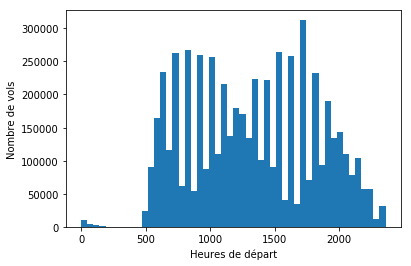

In [25]:
#A comparer avec le nombre de vols en fonction de l'heure de départ
plt.hist(vols["SCHEDULED_DEPARTURE"],bins=50,histtype='bar')
plt.xlabel("Heures de départ")
plt.ylabel("Nombre de vols")
plt.show()

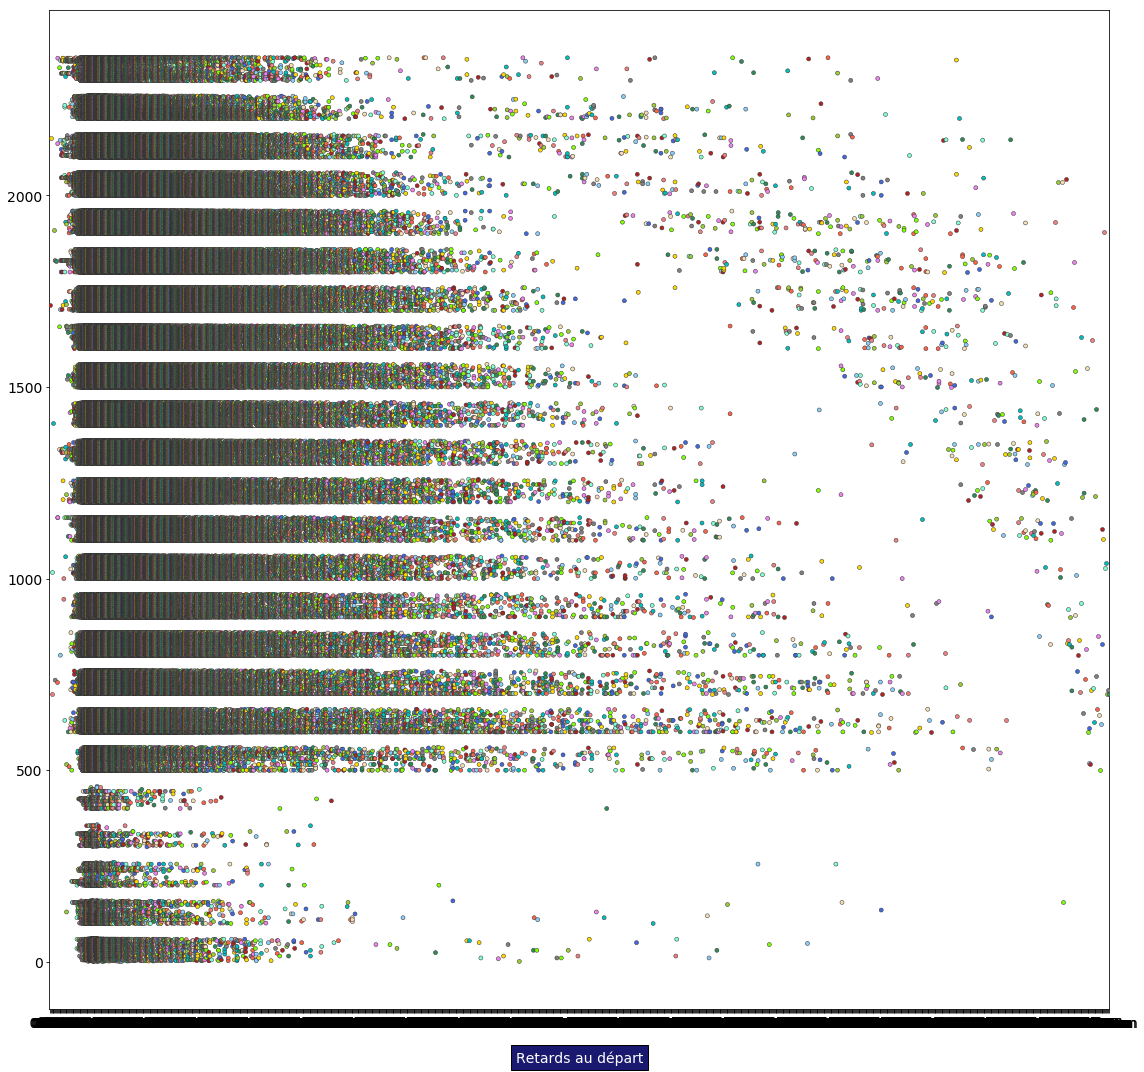

In [21]:
# Visualisation des temps de retards par heure
fig = plt.figure(1, figsize=(16,15))
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

axe = sns.stripplot(y="SCHEDULED_DEPARTURE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=vols.loc[:, ['SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY']], linewidth = 0.5,  jitter=True)
plt.setp(axe.get_xticklabels(), fontsize=14)
plt.setp(axe.get_yticklabels(), fontsize=14)
axe.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in axe.get_xticks()])
plt.xlabel('Retards au départ', fontsize=14, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
axe.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 
plt.show()

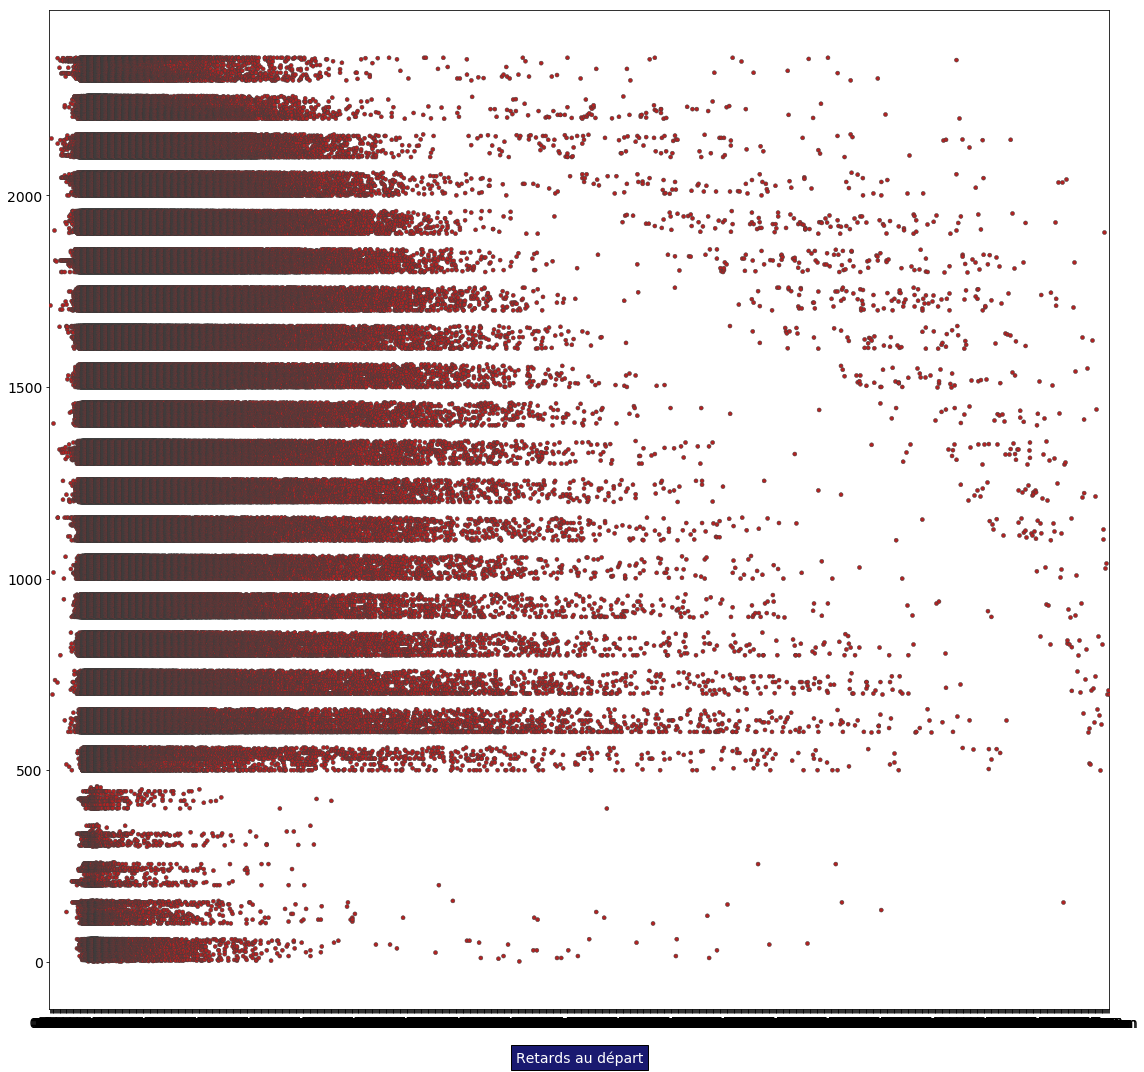

In [39]:
# Visualisation des temps de retards par heure
fig = plt.figure(1, figsize=(16,15))
colors = ['firebrick']

axe = sns.stripplot(y="SCHEDULED_DEPARTURE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=vols.loc[:, ['SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY']], linewidth = 0.5,  jitter=True)
plt.setp(axe.get_xticklabels(), fontsize=14)
plt.setp(axe.get_yticklabels(), fontsize=14)
axe.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in axe.get_xticks()])
plt.xlabel('Retards au départ', fontsize=14, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
axe.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 
plt.show()

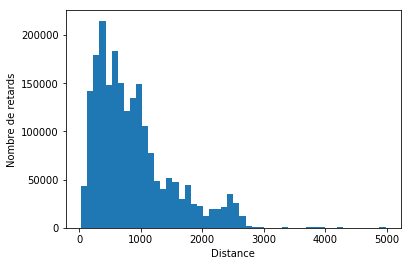

In [69]:
# Nombre de retards en fonction de la distance du vol
plt.hist(vols[vols["DEPARTURE_DELAY"]>0]["DISTANCE"],bins=50,histtype='bar')
plt.xlabel("Distance")
plt.ylabel("Nombre de retards")
plt.show()

In [70]:
# Nombre de retards et vols au départ en fonction de la distance
Retards_vols_distance = vols[(vols["DEPARTURE_DELAY"] > 0)]["DISTANCE"].value_counts()
Nombre_vols_distance = vols["DISTANCE"].value_counts()
Retards_vols_distance = Retards_vols_distance.reset_index().sort_values(by='index',ascending=True).set_index('index')
Nombre_vols_distance = Nombre_vols_distance.reset_index().sort_values(by='index',ascending=True).set_index('index')

In [71]:
# Calculs des proportions de retards par heure
n = len(Retards_vols_distance)
Proportions = np.zeros(n)
j = 0
for i in range(n):
    
    while (Retards_vols_distance.index[i]!=Nombre_vols_distance.index[j]):
        j+=1
    Proportions[i] = Retards_vols_distance.iloc[i,0]/Nombre_vols_distance.iloc[j,0]
    j+=1
Proportions_triees = pd.DataFrame(Proportions,Retards_vols_distance.index).sort_values(by=0,ascending=True)

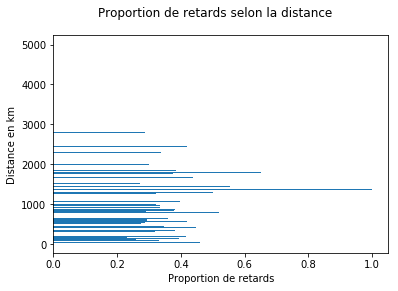

In [73]:
# Affichage des proportions de retards par distance
fig, ax = plt.subplots()
ax.barh(Proportions_triees.index, Proportions_triees.iloc[:,0])
fig.suptitle("Proportion de retards selon la distance")
plt.ylabel("Distance en km")
plt.xlabel("Proportion de retards")
plt.show()

In [3]:
# Donner un label numérique aux compagnies aériennes
le = LabelEncoder()
le.fit(vols["AIRLINE"])
Donnees_numerisees_Compagnies = le.transform(vols["AIRLINE"])
vols["AIRLINE_NUM"] = Donnees_numerisees_Compagnies.tolist()
#le.inverse_transform([0])

In [4]:
# Donner un label numérique aux compagnies aériennes
le = LabelEncoder()
le.fit(vols["ORIGIN_AIRPORT"])
Donnees_numerisees_Aeroports_origine = le.transform(vols["ORIGIN_AIRPORT"])
Donnees_numerisees_Aeroports_destination = le.transform(vols["DESTINATION_AIRPORT"])
vols["ORIGIN_AIRPORT_NUM"] = Donnees_numerisees_Aeroports_origine.tolist()
vols["DESTINATION_AIRPORT_NUM"] = Donnees_numerisees_Aeroports_destination.tolist()
#le.inverse_transform([0])

In [5]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from matplotlib.ticker import NullFormatter
from time import time

In [6]:
#Choix des attributs
num_attributs = ['MONTH', 'DAY', 'DAY_OF_WEEK','SCHEDULED_TIME','DISTANCE','SCHEDULED_ARRIVAL','AIRLINE_NUM','ORIGIN_AIRPORT_NUM','DESTINATION_AIRPORT_NUM']
p=len(num_attributs)


In [23]:
#Normalisation pour l'ACP
X = vols.loc[:,num_attributs]
Z = StandardScaler().fit_transform(X)

#ACP
acp = PCA(svd_solver='full', n_components=None)
Coordonnées = acp.fit_transform(Z)

eigval =(p-1)*acp.explained_variance_/p
eigval

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([1.80221947, 1.01629443, 0.90588416, 0.89049773, 0.88852642,
       0.8772761 , 0.85929497, 0.74674291, 0.01326522])

In [24]:
acp.explained_variance_ratio_

array([0.22527739, 0.12703678, 0.1132355 , 0.1113122 , 0.11106578,
       0.10965949, 0.10741185, 0.09334285, 0.00165815])

In [25]:
# Pourcentage de variance expliquée cumulée
for i in range(1,p+1):
    print(sum(acp.explained_variance_ratio_[:i]),"%")

0.22527739410938902 %
0.3523141755998388 %
0.46554967595858915 %
0.5768618724114793 %
0.6879276552153453 %
0.7975871480706633 %
0.9049990005448012 %
0.9983418474058534 %
1.0 %


In [26]:
#Sélection de 7 colonnes...
X_reduit = Coordonnées[:,:7]

In [101]:
#Problèmes de mémoire
X = vols.loc[:,num_attributs]
n_neighbors = 10
n_components = 2

t0 = time()
Y = Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

MemoryError: 

In [18]:
# Quelques minutes pour 100 000...
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=6,n_neighbors=20)
X_transformed = embedding.fit_transform(X[:100000])
X_transformed.shape

(100000, 6)

In [19]:
X_transformed

array([[-4.97080247e-04, -1.31124713e-03, -1.37467279e-04,
         1.44512497e-03,  1.49199062e-04, -1.07123346e-03],
       [-6.15746854e-04,  1.56867483e-03, -1.92258043e-03,
        -1.49731507e-03, -1.62898012e-03, -1.39677134e-03],
       [-6.80984688e-04,  2.23695293e-03, -2.40252431e-03,
        -2.26219446e-03, -2.09465266e-03, -9.21240465e-04],
       ...,
       [-4.55112906e-04, -4.30693088e-04,  3.15539157e-04,
         5.48255203e-04,  5.27357581e-05, -2.41105564e-04],
       [-4.48450320e-04, -6.23051658e-04,  5.05227514e-04,
        -5.34516201e-04, -1.14943937e-04,  9.42738453e-04],
       [ 1.19896326e-06,  1.71510313e-05,  7.08247741e-05,
         2.84060515e-05, -1.67350385e-04, -1.29503849e-03]])

In [10]:
# Trop long...
'''#Normalisation
X = StandardScaler().fit_transform(X)

#PCA
rbf_pca=KernelPCA(n_components=2, kernel="rbf", gamma=0.03)
X_reduced=rbf_pca.fit_transform(X) #X est la liste des attibuts qu'on décide d'utiliser pour construire nos modèles'''

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
X = vols.loc[:,num_attributs]
transformer = FastICA(n_components=7,
        random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

In [7]:
vols2 = vols
'''vols2 = pd.concat([pd.DataFrame(X_reduit),vols["DEPARTURE_DELAY"]],axis=1)
num_attributs=range(7)'''

'vols2 = pd.concat([pd.DataFrame(X_reduit),vols["DEPARTURE_DELAY"]],axis=1)\nnum_attributs=range(7)'

In [8]:
#Création d'un ensemble de test
from sklearn.model_selection import train_test_split, cross_val_score

#Séparation aléatoire de la base de données en base d'apprentissage (80% de la bdd) et en base de test(20% de la bdd)
vols_apprentissage, vols_test = train_test_split(vols2, test_size=0.2, random_state=42)


In [9]:
y_apprentissage = vols_apprentissage.loc[:,"DEPARTURE_DELAY"]
y_test = vols_test.loc[:,"DEPARTURE_DELAY"]
x_apprentissage = vols_apprentissage.loc[:,num_attributs]
x_test = vols_test.loc[:,num_attributs]

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor, HuberRegressor, RANSACRegressor, PassiveAggressiveRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
np.random.seed(0)
#score = cross_val_score(fg, x_apprentissage,y_apprentissage,cv=3)
#r2_score(y_test,y_predicted_svm_reg_rbf)
#explained_variance_score(y_true, y_pred, multioutput='uniform_average')

In [58]:
# Entre 20 et 30 : croissance de l'erreur
for i in range(20,31,2):
    tree_reg=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=i, min_samples_split=2, min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0, max_features=None, random_state=42, 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
    tree_reg.fit(x_apprentissage,y_apprentissage)
    y_predicted_tree_reg = tree_reg.predict(x_test)

    print(mean_absolute_error(y_test,y_predicted_tree_reg,multioutput='raw_values'),' ')
    

[18.48610583]  
[18.85950597]  
[19.33027365]  
[19.88122037]  
[20.49511442]  
[21.10580655]  


In [59]:
# Entre 10 et 20 : 
for i in range(10,21,2):
    tree_reg=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=i, min_samples_split=2, min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0, max_features=None, random_state=42, 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
    tree_reg.fit(x_apprentissage,y_apprentissage)
    y_predicted_tree_reg = tree_reg.predict(x_test)

    print(mean_absolute_error(y_test,y_predicted_tree_reg,multioutput='raw_values'),' ')


[18.09408614]  
[18.03931888]  
[18.02781379]  
[18.1036597]  
[18.23795027]  
[18.48610583]  


In [61]:
# 13, 15: 
for i in [13,15]:
    tree_reg=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=i, min_samples_split=2, min_samples_leaf=1,
                                   min_weight_fraction_leaf=0.0, max_features=None, random_state=42, 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
    tree_reg.fit(x_apprentissage,y_apprentissage)
    y_predicted_tree_reg = tree_reg.predict(x_test)

    print(mean_absolute_error(y_test,y_predicted_tree_reg,multioutput='raw_values'),' ')
    
# 13 est la meilleure profondeur pour l'arbre de décision !

[17.30374223]  
[17.24849715]  


In [62]:
mean_squared_error(y_predicted_tree_reg,y_test)

1348.0404538746086

In [17]:
# Forêts aléatoires (quelques min~)

fg = RandomForestRegressor(n_estimators = 4, max_depth = 10)
fg.fit(x_apprentissage,y_apprentissage)
fg.feature_importances_

array([0.16741992, 0.22984248, 0.0540005 , 0.03612629, 0.02619718,
       0.30159128, 0.11500619, 0.04535755, 0.02445861])

In [18]:
y_predicted = fg.predict(x_test)

In [16]:
# n_estimators = 2 et max_depth = 10 
mean_absolute_error(y_test,y_predicted,multioutput='raw_values')

array([17.56064252])

In [19]:
# n_estimators = 4 et max_depth = 10 
mean_absolute_error(y_test,y_predicted,multioutput='raw_values')

array([17.54749458])

In [20]:
parametres = {'n_estimators':(10,50,100),'max_depth':range(6,10)}

fg=RandomForestRegressor()
GS = GridSearchCV(fg,parametres,cv=2)

GS.fit(x_apprentissage,y_apprentissage)

sorted(GS.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [23]:
y_predicted = GS.predict(x_test)

{'cv': 2,
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_star

In [22]:
mean_absolute_error(y_predicted,y_test)

17.61868777565322

In [57]:
mean_squared_error(y_predicted,y_test)

1296.7643912147405

In [ ]:
#SVR LONG (une nuit n'a pas suffi...)
'''
svm_reg_poly= SVR(kernel="poly", degree=3, C=100, epsilon=0.1)
svm_reg_poly.fit(x_apprentissage,y_apprentissage)

y_predicted_svm_reg_poly = svm_reg_poly.predict(x_test)
'''

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
# 15 sec pour 10 000
'''svm_reg_rbf= SVR(kernel="rbf", gamma=0.1, C=100, epsilon=0.1)
svm_reg_rbf.fit(x_apprentissage, y_apprentissage)
y_predicted_svm_reg_rbf = svm_reg_rbf.predict(x_test)'''

In [73]:
mean_absolute_error(y_test,y_predicted_svm_reg_rbf,multioutput='raw_values')

array([17.12517724])

In [82]:
# 15 sec pour 10 000
'''svm_reg_rbf2= SVR(kernel="rbf", gamma='scale', C=100, epsilon=0.1)
svm_reg_rbf2.fit(x_apprentissage, y_apprentissage)
y_predicted_svm_reg_rbf2 = svm_reg_rbf2.predict(x_test)'''

In [83]:
mean_absolute_error(y_test,y_predicted_svm_reg_rbf2,multioutput='raw_values')

array([15.9650888])

In [ ]:
# LONG
'''
svm_reg_lin= SVR(kernel="linear", C=100, epsilon=0.1)
svm_reg_lin.fit(x_apprentissage, y_apprentissage)
y_predicted_svm_reg_lin = svm_reg_lin.predict(x_test)'''

In [ ]:
mean_absolute_error(y_test,y_predicted_svm_reg_rbf2,multioutput='raw_values')

In [95]:
mean_absolute_error(y_test,y_predicted_RS_DTR,multioutput='raw_values')

array([17.88367302])

array([18.15369106])

In [29]:
sgd = SGDRegressor(alpha=0.01, max_iter=10)
sgd.fit(x_apprentissage, y_apprentissage)
y_predicted_sgdr = sgd.predict(x_test)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [61]:
mean_absolute_error(y_test,y_predicted_sgdr,multioutput='raw_values')

NameError: name 'y_predicted_sgdr' is not defined

In [25]:
# Trop long aussi
'''lsvr = LinearSVR(C=1.0,max_iter=100,random_state=42)
lsvr.fit(x_apprentissage,y_apprentissage)
y_predicted_lsvr = lsvr.predict(x_test)'''

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [27]:
mean_absolute_error(y_test,y_predicted_lsvr,multioutput='raw_values')

array([20.75771761])

In [24]:
# Pour différentes valeurs du nombre de voisins
for i in range(1,10):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(x_apprentissage,y_apprentissage)
    y_predicted_knr = KNR.predict(x_test)
    print(mean_absolute_error(y_test,y_predicted_knr,multioutput='raw_values'))

[21.62540843]
[20.08038575]
[19.42764801]
[19.02940558]
[18.77581348]
[18.59037451]
[18.44647954]
[18.32778108]
[18.23198789]


In [31]:
# Pour différentes valeurs du nombre de voisins
for i in range(10,51,10):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(x_apprentissage,y_apprentissage)
    y_predicted_knr = KNR.predict(x_test)
    print(mean_absolute_error(y_test,y_predicted_knr,multioutput='raw_values'))

[18.14668298]
[17.7963309]
[17.70057021]
[17.6750683]
[17.67089711]


In [32]:
# Pour différentes valeurs du nombre de voisins
for i in range(60,101,20):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(x_apprentissage,y_apprentissage)
    y_predicted_knr = KNR.predict(x_test)
    print(mean_absolute_error(y_test,y_predicted_knr,multioutput='raw_values'))

[17.67239691]
[17.68203528]
[17.6889083]


In [41]:
# Pour différentes valeurs du nombre de voisins
for i in range(47,55,2):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(x_apprentissage,y_apprentissage)
    y_predicted_knr = KNR.predict(x_test)
    print(mean_absolute_error(y_test,y_predicted_knr,multioutput='raw_values'))

[17.67275921]
[17.67116212]
[17.67028709]
[17.67043864]


In [45]:
KNR = KNeighborsRegressor(n_neighbors=52)
KNR.fit(x_apprentissage,y_apprentissage)
y_predicted_knr = KNR.predict(x_test)
print(mean_absolute_error(y_test,y_predicted_knr,multioutput='raw_values'))

[17.67033397]


In [56]:
mean_squared_error(y_test,y_predicted_knr,multioutput='raw_values')

array([1316.45859937])

In [ ]:
# Randomized Search
param_dist = {"n_neighbors":range(30,46,5)}

# run randomized search
KNR=KNeighborsRegressor()
random_search = RandomizedSearchCV(KNR, param_distributions=param_dist, random_state=42,
                                   n_iter=20, cv=2)
random_search.fit(x_apprentissage,y_apprentissage)
y_predicted_RS_DTR = GS.predict(x_test)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
# LONG
'''
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=300, random_state=42)
reg.fit(x_apprentissage, y_apprentissage)
y_predicted_adaboost = reg.predict(x_test)'''

In [ ]:
mean_absolute_error(y_test,y_predicted_adaboost,multioutput='raw_values')

In [39]:
# Bien
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(
    hidden_layer_sizes=(3,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

nn.fit(x_apprentissage, y_apprentissage)
y_predicted_RN = nn.predict(x_test)

In [40]:
mean_absolute_error(y_test,y_predicted_RN,multioutput='raw_values')

array([18.26130043])

In [48]:
mean_squared_error(y_test,y_predicted_RN,multioutput='raw_values')

array([1333.51113145])

In [ ]:
# Bien
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

nn.fit(x_apprentissage, y_apprentissage)
y_predicted_RN = nn.predict(x_test)

In [ ]:
# LONG
gbr = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                min_impurity_split=None, init=None, random_state=None, max_features=None, 
                                alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', 
                                validation_fraction=0.1, tol=0.0001)
gbr.fit(x_apprentissage, y_apprentissage)
y_predicted_gbr = gbr.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_predicted_gbr,multioutput='raw_values')

In [42]:
# OK
BR = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, 
                       bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, 
                       verbose=0)
BR.fit(x_apprentissage, y_apprentissage)
y_predicted_br = BR.predict(x_test)

In [43]:
mean_absolute_error(y_test,y_predicted_br,multioutput='raw_values')

array([18.61368854])

In [25]:
# OK
HR = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001, warm_start=False, fit_intercept=True, tol=1e-05)
HR.fit(x_apprentissage, y_apprentissage)
y_predicted_hr = HR.predict(x_test)

In [26]:
mean_absolute_error(y_test,y_predicted_hr,multioutput='raw_values')

array([14.59297746])

In [54]:
# OK
HR = HuberRegressor(epsilon=1.1, max_iter=100, alpha=0.000, warm_start=False, fit_intercept=True, tol=1e-05)
HR.fit(x_apprentissage, y_apprentissage)
y_predicted_hr = HR.predict(x_test)

In [36]:
mean_absolute_error(y_test,y_predicted_hr,multioutput='raw_values')


array([14.53905913])

In [55]:
mean_squared_error(y_test,y_predicted_hr,multioutput='raw_values')

array([1458.9597945])

In [37]:
# Moins bien, il vaut mieux coller aux données plutôt qu'accoder de l'importance aux outliers
HR = HuberRegressor(epsilon=1.8, max_iter=100, alpha=0.000, warm_start=False, fit_intercept=True, tol=1e-05)
HR.fit(x_apprentissage, y_apprentissage)
y_predicted_hr = HR.predict(x_test)

In [38]:
mean_absolute_error(y_test,y_predicted_hr,multioutput='raw_values')

array([15.11374913])

In [47]:
mean_squared_error(y_test,y_predicted_hr,multioutput='raw_values')

array([1420.02786304])

In [50]:
parametres = {'epsilon':(1,1.05,1.1,1.2,1.3,1.4,1.5),'alpha':(0,0.0001)}

HR=HuberRegressor()
GS_HR = GridSearchCV(HR,parametres,cv=2)

GS_HR.fit(x_apprentissage,y_apprentissage)

y_predicted_HR = GS_HR.predict(x_test)

In [51]:
mean_absolute_error(y_test,y_predicted_HR,multioutput='raw_values')
#

array([14.63620146])

In [53]:
mean_squared_error(y_test,y_predicted_HR,multioutput='raw_values')

array([1336.40786316])

In [27]:
# OK
TTR = TransformedTargetRegressor(regressor=None, transformer=None, func=None, inverse_func=None, check_inverse=True)
TTR.fit(x_apprentissage, y_apprentissage)
y_predicted_ttr = TTR.predict(x_test)

In [28]:
mean_absolute_error(y_test,y_predicted_ttr,multioutput='raw_values')

array([18.28310387])

In [52]:
# prend du temps 20 sec pour 10 000
GPR = GaussianProcessRegressor(kernel=None, alpha=1e-6, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, 
                         normalize_y=False, copy_X_train=True, random_state=42)
GPR.fit(x_apprentissage, y_apprentissage)
y_predicted_gpr = GPR.predict(x_test)

MemoryError: 

In [ ]:
mean_absolute_error(y_test,y_predicted_gpr,multioutput='raw_values')

In [29]:
# OK
RANSAC = RANSACRegressor(base_estimator=None, min_samples=None, residual_threshold=None, is_data_valid=None, 
                is_model_valid=None, max_trials=100, stop_probability=0.99, loss='absolute_loss', random_state=None)
RANSAC.fit(x_apprentissage,y_apprentissage)
y_predicted_ransac = RANSAC.predict(x_test)

In [30]:
mean_absolute_error(y_test,y_predicted_ransac,multioutput='raw_values')

array([16.84452559])

In [46]:
mean_squared_error(y_test,y_predicted_ransac,multioutput='raw_values')

array([1526.57483739])

In [79]:
# Pas adapté car ONLINE (testé pour 100 000)
PAR = PassiveAggressiveRegressor(C=1.0, fit_intercept=True, max_iter=None, tol=None, early_stopping=False, validation_fraction=0.1,
                           n_iter_no_change=5, shuffle=True, verbose=0, loss='epsilon_insensitive', epsilon=0.1, 
                           random_state=None, warm_start=False, average=False, n_iter=None)
PAR.fit(x_apprentissage,y_apprentissage)
y_predicted_par = PAR.predict(x_test)


C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [80]:
mean_absolute_error(y_test,y_predicted_par,multioutput='raw_values')

array([25.33449954])